In [823]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [824]:
client = bigquery.Client()

In [825]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [826]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [827]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [828]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [829]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [830]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 445 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [831]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-06-01_2020-07-19.csv")

In [832]:
julysale.columns.values[1] = 'SKU'

In [833]:
julysale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_title      2598 non-null   object 
 1   SKU                2598 non-null   object 
 2   day                2647 non-null   object 
 3   pos_location_name  0 non-null      float64
 4   net_quantity       2647 non-null   int64  
 5   gross_sales        2647 non-null   float64
 6   discounts          2647 non-null   float64
 7   returns            2647 non-null   float64
 8   net_sales          2647 non-null   float64
 9   taxes              2647 non-null   float64
 10  total_sales        2647 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 227.6+ KB


In [834]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [835]:
julysale

product_title       SKU         day  \
0        Yumyum Friends, Tote bag - Little Ryan    F10931  2020-06-05   
1         Portable Fan with Cradle Stand - Ryan    F08846  2020-06-25   
2                            Socks, Navy - Ryan    F10982  2020-07-11   
3      KANGDANIEL EDITION, Body Pillow - Apeach    F10571  2020-07-01   
4              Coin Wallet with Key Ring - Ryan    F08777  2020-06-20   
...                                         ...       ...         ...   
2642                   Faux Fur Gloves - Apeach    F10101  2020-06-29   
2643              Humidifier Filters, Pack of 3    F08961  2020-07-13   
2644      Portable Fan with Cradle Stand - Ryan  93008882  2020-06-08   
2645                  Mini Pillow - Lovely Ryan    F09923  2020-06-22   
2646  Skateboard Cotton Face Socks - Ryan, Heel  93009450  2020-06-16   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5       114.95      -3.43     0.00   
1                   NaN             5       133.27     -21.30     0.00   
2                   NaN             4        23.69      -7.10     0.00   
3                   NaN             4        79.96       0.00     0.00   
4                   NaN             4        27.96       0.00     0.00   
...                 ...           ...          ...        ...      ...   
2642                NaN            -1         0.00       0.00   -14.69   
2643                NaN            -2         0.00       0.00    -8.15   
2644                NaN            -2         0.00       0.00   -35.82   
2645                NaN            -2         0.00       0.00   -24.00   
2646                NaN            -2         0.00       0.00    -6.48   

      net_sales  taxes  ...        ASIN        BARCODE             NAME(KR)  \
0        111.52   0.00  ...        None  8809681708968         얌얌 에코백_리틀라이언   
1        111.97  22.40  ...  B07RZ1FSN7  8809641467386      크레들 핸디형 선풍기_라이언   
2         16.59   2.98  ...        #N/A  8809681709699  프렌즈미디움삭스(공용)_네이비라이언   
3         79.96  16.00  ...  B084D6DY4R  8809681705714        강다니엘에디션 바디필로우   
4         27.96   0.00  ...  B07QYNCBXG  8809641466846         구슬동전지갑-리틀라이언   
...         ...    ...  ...         ...            ...                  ...   
2642     -14.69   0.00  ...  B07ZQGFMMX  8809681700221             엄지장갑 어피치   
2643      -8.15  -1.63  ...        None  8809656130145           프렌즈 가습기 필터   
2644     -35.82  -7.16  ...         NaN            NaN                  NaN   
2645     -24.00   0.00  ...        None  8809641469113        베이비필로우_러블리라이언   
2646      -6.48   0.00  ...  B07RYN2GKC  8809656137113           라인보드삭스-라이언   

         SKU_2      ASIN_2 CHARACTER     CATEGORY               ITEM  \
0       F10931        None      Ryan  Accessories         Canvas bag   
1       F08846  B07RZ1FSN7      Ryan         Home               Fans   
2       F10982        #N/A      Ryan  Accessories              Socks   
3       F10571  B084D6DY4R    Apeach        Plush        Body pillow   
4     93008813  B07QYNCBXG      Ryan  Accessories       Coin Wallets   
...        ...         ...       ...          ...                ...   
2642    F10101  B07ZQGFMMX    Apeach       Winter        Glove Mitts   
2643    F08961        None         -         Home  Humidifier Filter   
2644       NaN         NaN       NaN          NaN                NaN   
2645        50        None      Ryan        Plush        Mini Pillow   
2646  93009450  B07RYN2GKC      Ryan  Accessories              Socks   

               THEME     PRODUCT_NAME(KR)  
0       Lemon Terras         얌얌 에코백_리틀라이언  
1              Basic      크레들 핸디형 선풍기_라이언  
2        Happy Weeks  프렌즈미디움삭스(공용)_네이비라이언  
3        Kang Daniel        강다니엘에디션 바디필로우  
4     Little Friends         구슬동전지갑-리틀라이언  
...              ...                  ...  
2642           Basic             엄지장갑 어피치  
2643           Basic           프렌즈 가습기 필터  
2644             NaN                  NaN  
2645     Lovel

In [836]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [837]:
julysale['dayofweek'] = julysale['day'].dt.week
julysale['year'] = julysale['day'].dt.year
julysale['month'] = julysale['day'].dt.month


In [838]:
julysale = julysale.loc[julysale['month'].isin([7])]
julysale

product_title       SKU        day  \
2                                    Socks, Navy - Ryan    F10982 2020-07-11   
3              KANGDANIEL EDITION, Body Pillow - Apeach    F10571 2020-07-01   
5      KANGDANIEL EDITION, Plush Keyring - Happy Apeach    F10486 2020-07-01   
7     Happy Weeks, Multi Coloured Pen, 4 Colours & M...    F10761 2020-07-02   
10             Happy Weeks, Removable Stickers - Apeach    F10751 2020-07-03   
...                                                 ...       ...        ...   
2634                 Clear Passport Cover - Little Ryan  93008315 2020-07-06   
2635                       Hugging Body Pillow - Apeach    F10049 2020-07-08   
2636                       Mini A6 Ruled Notepad - Ryan  93008583 2020-07-06   
2637             KANGDANIEL EDITION, Pin Badge - Apeach    F10491 2020-07-03   
2643                      Humidifier Filters, Pack of 3    F08961 2020-07-13   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
2                   NaN             4        23.69      -7.10     0.00   
3                   NaN             4        79.96       0.00     0.00   
5                   NaN             4        30.32       0.00     0.00   
7                   NaN             4        26.63      -7.99     0.00   
10                  NaN             4        17.05      -5.11     0.00   
...                 ...           ...          ...        ...      ...   
2634                NaN            -1         7.48       0.00   -15.50   
2635                NaN            -1         0.00       0.00   -22.74   
2636                NaN            -1         0.00       0.00    -2.91   
2637                NaN            -1         0.00       0.00    -7.58   
2643                NaN            -2         0.00       0.00    -8.15   

      net_sales  taxes  ...   SKU_2      ASIN_2 CHARACTER     CATEGORY  \
2         16.59   2.98  ...  F10982        #N/A      Ryan  Accessories   
3         79.96  16.00  ...  F10571  B084D6DY4R    Apeach        Plush   
5         30.32   6.04  ...  F10486           0    Apeach  Accessories   
7         18.64   3.73  ...  F10761  B084JMJSBS    Apeach   Stationery   
10        11.94   2.03  ...  F10751  B084JSM6YB    Apeach   Stationery   
...         ...    ...  ...     ...         ...       ...          ...   
2634      -8.02  -0.97  ...      30           0      Ryan       Travel   
2635     -22.74  -4.55  ...  F10049  B07YLKGT51    Apeach        Plush   
2636      -2.91  -0.58  ...      50           0      Ryan   Stationery   
2637      -7.58  -1.51  ...  F10491           0    Apeach  Accessories   
2643      -8.15  -1.63  ...  F08961        None         -         Home   

                   ITEM           THEME     PRODUCT_NAME(KR) dayofweek  year  \
2                 Socks     Happy Weeks  프렌즈미디움삭스(공용)_네이비라이언        28  2020   
3           Body pillow     Kang Daniel        강다니엘에디션 바디필로우        27  2020   
5              Keyrings     Kang Daniel  강다니엘에디션 소프트키링_해피어피치        27  2020   
7                   Pen     Happy Weeks  해피위크 4컬러+샤프 멀티펜_어피치        27  2020   
10             Stickers     Happy Weeks     해피위크 리무버블스티커_어피치        27  2020   
...                 ...             ...                  ...       ...   ...   
2634    Passport Covers  Little Friends         투명여권지갑_리틀라이언        28  2020   
2635        Body pillow  Little Friends         말랑허그바디쿠션_어피치        28  2020   
2636           Notepads  Little Friends      리틀스케치북_미니노트_라이언        28  2020   
2637          Pin badge     Kang Daniel    강다니엘에디션 핀뱃지세트(2p)        27  2020   
2643  Humidifier Filter           Basic           프렌즈 가습기 필터        29  2020   

     month  
2        7  
3        7  
5        7  
7        7  
10       7  
...    ...  
2634     7  
2635     7  
2636     7  
2637     7  
2643     7  

[879 rows x 25 columns]

In [839]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'
julysale.loc[julysale['CHARACTER'] == 'All', 'CHARACTER'] = 'Together'

In [840]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

29    7
28    7
27    5
Name: dayofweek, dtype: int64

In [841]:
theme_overall = pd.pivot_table(julysale, index = 'THEME', columns=['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins=False)
theme_overall = theme_overall.sort_values(by = 29, ascending= False)
theme_overall

dayofweek          27  28  29
THEME                        
Happy Weeks        68  54  70
Little Friends     73  63  52
Basic              69  38  22
Lemon Terras       31  25  21
Baby Dreaming      43  44  17
Yamyam Friends     10   5  11
Lovely Apeach      16  13   9
Pompom Friends      7  10   7
Winter Wonderland   2   2   6
Autumn Story        5   4   5
Kang Daniel        36  14   4
Lovely Ryan         4   1   3
Heart Apeach        9   6   2
Forest Ryan         4   6   2
Cheeze Friends      3   3   2
Lazy Sunday         3   3   2
Twice               2   1   1
Honey Friends       0   5   0
Little friends      1   3   0
Battle Ground       1   0   0

In [842]:
theme_sale = pd.pivot_table(julysale, index = ['THEME', 'CATEGORY', 'ITEM', 'product_title'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
theme_sale

dayofweek                                                                                            27  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             1   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            0   
                                                Yumyum Friends, AirPods Case- Little Apeach           0   
                                                Yumyum Friends, AirPods Case- Little Jay-G            1   
                                                Yumyum Friends, AirPods Case- Little Ryan             3   
All                                                                                                 387   

dayofweek                                                                                            28  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             2   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      1   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            0   
                                                Yumyum Friends, AirPods Case- Little Apeach           0   
                                                Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             1   
All                                                                                                 300   

dayofweek                                                                                            29  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             3   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    1   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            1   
                                                Yumyum Friends, AirPods Case- Little Apeach           1   
                                                Yumyum Friends, AirPods Case- Little Jay-G            0   
                                       

In [843]:
theme_sale

dayofweek                                                                                            27  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             1   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            0   
                                                Yumyum Friends, AirPods Case- Little Apeach           0   
                                                Yumyum Friends, AirPods Case- Little Jay-G            1   
                                                Yumyum Friends, AirPods Case- Little Ryan             3   
All                                                                                                 387   

dayofweek                                                                                            28  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             2   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      1   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            0   
                                                Yumyum Friends, AirPods Case- Little Apeach           0   
                                                Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             1   
All                                                                                                 300   

dayofweek                                                                                            29  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             3   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    1   
                                                Baby Dreaming Theme, Plush Keyring - Little Muzi      0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case - Little Tube            1   
                                                Yumyum Friends, AirPods Case- Little Apeach           1   
                                                Yumyum Friends, AirPods Case- Little Jay-G            0   
                                       

In [844]:
littlefriends = theme_sale.query("THEME == ['Little Friends']").head(50)
littlefriends.sort_values(by=29, ascending= False)

ad- Cheeseball Ryan      0   
               Home        Mood Lamp            Silicone Mood Lamp - Little Apeach                 0   
               Living      Slippers             Indoor Slippers White - Apeach                     0   
               Accessories Keyrings             Keyring - Tiny Jay-G                               1   
                           Coin Wallets         Coin Wallet - Little Ryan                          0   
                           Keyrings             Keyring - Tiny Muzi                                1   
                           Plush Keyring        Mini Face Plush Keyring - Little Con               0   
               Beauty      Mirrors              Compact Handheld Silicone Mirror - Ryan            0   
               Accessories Card Wallets         Foldable Card ID Wallet with Neck Strap - Ryan     3   
               Stationery  Pen                  Retractable Highlighters Pen Set - Little Apeach   1   
                           Notepads             Mini A6 Ruled Notepad - Ryan                       2   
                           Pen                  Retractable Highlighters Pen Set - Little Ryan     1   
               Plush       Mini Pillow          Mini Pillow - Little Frodo                         0   
               Stationery  Message Cards        Heart Card - Ryan                                  2   
                                                Cake Card - Apeach, Ryan, Frodo                    7   
               Accessories Coin Wallets         Coin Wallet with Band - Neo                        0   
               Stationery  Diary set            2020 Diary Set - Ryan (Korean Holiday Ver.)        1   
               Accessories Keyrings             Keyring - Tiny Frodo                               0   
               Plush       Mini Pillow          Mini Pillow - Little Tube                          1   
               Stationery  Pencil Cases         Plush Pencil Case - Muzi                           1   
                           Message Cards        L.O.V.E. Card - Neo                                1   
               Home        Humidifier           Humidifier - Little Apeach                         0   
               Plush       Face Cushions        Soft Face Cushion - Neo                            0   
                           Body Pillow          Hugging Body Pillow - Ryan                         0   
               Pet         Poop bag             Dog Poop Bag Case - Ryan                           2   
                                                Dog Poop Bag Case - Apeach                         1   
               Accessories Plush Keyring        Mini Face Plush Keyring - Little Apeach            1   
               Living      Umbrellas            Umbrella - Ryan                                    1   
                           Tumblers             Face Stainless Bottle - Apeach                     1   
               Accessories Card Wallets         Foldable Card ID Wallet with Neck Strap - Apeach   3   
                           Plush Keyring        Mini Face Plush Keyring - Little Muzi              1   
               Living      Rubbish Bin          Mini Desktop Rubbish Bin - Little Ryan             1   
                           Mobile Number Plates Mobile Number Plate - Ryan                         0   
               Accessories Plush Keyring        Mini Face Plush Keyring - Little Ryan              1   
                           Socks                Stripe Calf Socks - Tube                           0   
               Beauty      Mirrors              Compact Handheld Silicone Mirror - Neo             0   
               Stationery  Pencil Cases         Plush Pencil Case - Ryan                           2   

dayofweek                                                                                         28  \
THEME          CATEGORY    ITEM                 product_title                                          
Little Friends Li

In [845]:
Happyweeks = theme_sale.query("THEME == ['Happy Weeks']").head(50)
Happyweeks.sort_values(by =29, ascending= False)

2   
            Accessories Socks                Socks, Happy Saturday - Ryan & Con                   1   
                                             Socks, Happy Week - Muzi & Con & Ryan                0   
            Stationery  Notepads             Happy Weeks, A5 Ringbound Notepad - Tube             1   
                                             Happy Weeks, Ruled Note - Sunday Tube                4   
            Tech&Accs   Airpods case         Happy Weeks, AirPods Case - Ryan                     0   
            Stationery  Stickers             Happy Weeks, Removable Stickers - Ryan               1   
                        Notepads             Happy Weeks, Ruled Note - Saturday Ryan              0   
                        Message Cards        Happy Weeks, Message Card - Apeach                   2   
            Accessories Socks                Low Cut Socks - Ryan & Apeach                        0   
            Stationery  Notepads             Happy Weeks, PVC Cover Ruled Notepad - Apeach        3   
                                             Happy Weeks, PVC Cover Ruled Notepad - Ryan          2   
            Accessories Socks                Socks, Pink - Apeach                                 4   
                                             Socks, Board - Ryan                                  1   
            Tech&Accs   Airpods case         Happy Weeks, Airpods Pro Case - Ryan                 0   
            Stationery  Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   5   
                                             Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   2   
                                             Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
                        Notepads             Happy Weeks, Wirebound Notepad - Apeach              0   
                        Stickers             Happy Weeks, Face Stickers - Ryan, Tube              0   
                        Notepads             Happy Weeks, Ruled Note - Wednesday Neo              0   
            Tech&Accs   Airpods case         Happy Weeks, AirPods Pro Case - Apeach               2   
            Stationery  Stickers             Happy Weeks, Diary Decoration Sticker                0   
            Accessories Socks                Low Cut Socks - Muzi & Tube                          0   
            Stationery  Notepads             Happy Weeks, Ruled Note - Monday Muzi                1   
                                             Happy Weeks, A5 Ringbound Notepad - Ryan             1   
            Accessories Socks                Low Cut Socks - Ryan & Con                           1   
                                             Socks, Tulip - Apeach                                2   
            Stationery  Desk Mat             Happy Weeks, Desk Mat - Apeach                       0   
                        Index Folder         Happy Weeks, Document Index file - Ryan              0   
            Tech&Accs   Mouse Pad            Happy Weeks, Mouse Pad - Ryan                        2   
            Stationery  Letter set           Happy Weeks, Letters and Envelopes Sets - Apeach     4   
                        Notepads             Happy Weeks, A5 Ringbound Notepad - Frodo            1   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
                        Index Folder         Happy Weeks, Zipper File Folder - Ryan               1   
                                             Happy Weeks, Zipper File Folder - Apeach             1   
                        Pen                  Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   0   
                        Stickers             Happy Weeks, Removable Stickers - Apeach             5   
                        Index Folder         Happy Weeks, Document Index file - Muzi              1   
                                             Happy Weeks, Document Index file - A

In [846]:
babydreaming = theme_sale.query("THEME == ['Baby Dreaming']").head(50)
babydreaming.sort_values(by =29, ascending= False)

dayofweek                                                                                          27  \
THEME         CATEGORY    ITEM                 product_title                                            
Baby Dreaming Accessories Pouches              Baby Dreaming Theme, Cosmetic Pouch - Little Ap...   4   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Ryan             4   
                          Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Apeach     3   
              Beauty      Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Apeach           1   
              Stationery  Stickers             Baby Dreaming Theme, Decoration Sticker - Pink       1   
              Accessories Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Ryan     0   
                                               Baby Dreaming Theme, Plush Keyring - Little Apeach   0   
              Stationery  Masking Tape         Baby Dreaming Theme, Masking Tape, Pack of 2         1   
                          Pen                  Baby Dreaming Theme, Double Sided Highlighters,...   2   
              Beauty      Brush                Baby Dreaming Theme, Hair Brush - Apeach             0   
              Stationery  Stickers             Baby Dreaming Theme, Decoration Sticker - Blue       0   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Tube             1   
              Stationery  Stickers             Baby Dreaming Theme, Day Index Sticker               1   
              Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan               0   
              Stationery  Sticky Notes & Memos Baby Dreaming Theme, Pen Holder & Memo               0   
              Tech&Accs   Airpods Keyring      Baby Dreaming Theme, Keyring - Little Ryan           0   
                          Airpods case         Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                                               Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
                          Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   2   
                                               Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
                                               Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                          Airpods Keyring      Baby Dreaming Theme, Keyring - Little Apeach         0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Neo        1   
                          Plush Toys           Baby Dreaming Theme, Plush - Little Frodo            1   
                          Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
                                               Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
              Living      Pyjamas              Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
                                               Baby Dreaming Theme, Kids Pyjama - Little Apeach     1   
              Beauty      Mirrors              Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                                               Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
                          Hair Rollers         Baby Dreaming Theme, Hair Roller - Apeach            0   
                          Cosmetics Puff       Baby Dreaming Theme, Makeup Blender  -  Apeach       3   
              Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ap...   4   
              Accessories Pouches              Baby Dreaming Theme, Glitter Pouch - Ryan            0   
          

In [847]:
basic = theme_sale.query("THEME == ['Basic']").head(50)
basic.sort_values(by = 29, ascending= False)

Basic Plush             Body Pillow       Soft Body Pillow - Ryan                           3   
      Living            Tumblers          Basic Stainless Tumbler - Ryan, Black             0   
      Travel            Luggage Tags      Luggage Tag - Apeach                              0   
      Tech&Accs         Airpods Keyring   Keyring - Hoodie Tube                             2   
      Accessories       Keyrings          Keyring - Ryan (with Ribbon)                      1   
                                          Keyring - Apeach (Peach Ver.)                     0   
      Travel            Luggage Tags      Luggage Tag - Ryan                                0   
      Tech&Accs         Phone Cases       Popsockets - Apeach, Iconic Pattern               4   
                                          Phonecase ( iPhone 11 / iPhone 11 Pro) - Apeach   0   
                        Airpods case      AirPods Case Cover with Keyring -Ryan             0   
                        Airpods Keyring   Keyring - Peach Apeach                            1   
      Stationery        Pen               Spinning Retractable Gel Pen - Neo                0   
                                          Retractable Gel Pen - Ryan (with Ribbon)          3   
      Living            Tumblers          Basic Stainless Tumbler - Ryan, White             1   
      Plush             Face Cushions     Soft Face Cushion (M) - Apeach                    3   
      Kitchen & Laundry Silicone Holder   Silicone Hanging Holder - Ryan                    0   
      Accessories       Pin badge         Metal Pin Badges - Tube                           2   
      Bath              Toothbrush        Toothbrush with Brush Case - Ryan                 1   
      Tech&Accs         Selfie Stick      Selfie Stick - Little Apeach                      1   
                        Airpods Pouch     Mini Pouch - Ryan                                 0   
      Accessories       Plush Keyring     Mini Face Plush Keyring - Ryan                    3   
                                          Mini Face Plush Keyring - Muzi                    1   
      Tech&Accs         Phone Cases       Phonecase ( iPhone 11 / iPhone 11 Pro) - Con      0   
      Accessories       Plush Keyring     Mini Face Plush Keyring - Apeach                  2   
      Tech&Accs         Phone Cases       Popsockets - Ryan                                 1   
                        Selfie Stick      Selfie Stick - Little Ryan                        1   
      Bath              Toothbrush        Toothbrush with Brush Case - Con                  0   
      Toys              Figures           Decoration Figure - Ryan                          1   
                                          Figurine Decoration for Cup - Hoodie Ryan         1   
      Travel            Cross bag         Cross Bag - Pink, Apeach                          2   
      Accessories       Pin badge         Metal Pin Badges - Peach Apeach                   1   
      Travel            Travel Pouches    Travel Pouch Set of 10 - Apeach                   1   
      Tech&Accs         Airpods Pouch     Mini Pouch - Apeach                               1   
      Travel            Travel Pouches    Travel Pouch Set of 10 - Ryan                     1   
      Living            Mugs              Basic Black Mug - Ryan                            3   
      Stationery        Pen               Spinning Retractable Gel Pen - Ryan               3   
      Plush             Plush Toys        Plush - Tube                                      1   
                                          Plush - Neo                                       1   
                        Face Cushions     Soft Face Cushion - Jay-G                         1   
      Home              Fans              Portable Fan with Cradle Stand - Apeach           0   
                                          Portable Fan with Cradle Stand - Ryan             4   
      Plush            

In [848]:
lemonterrace = theme_sale.query("THEME == ['Lemon Terras']").head(50)
lemonterrace.sort_values(by = 29, ascending= False)

dayofweek                                                                                27  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               2   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            3   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        2   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Apeach         0   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Notepads             Lemon Terrace, Notepad & Pen Set - Ryan     0   
                                              Lemon Terrace, Notepad & Pen Set - Apeach   1   
                         Clip board           Lemon Terrace, A4 Clipboard                 0   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 4   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Apeach          2   
                                              Lemon Terrace, Pyjama Set - Ryan            1   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     1   
             Living      Pyjamas              Lemon Terrace, Pyjama Dress - Apeach        0   
             Bath        Bathrobes            Lemon Terrace, Tube Bathrobe                1   
             Accessories Socks                Low Cut Socks - Ryan & Con                  1   
                         Pouches              Lemon Terrace, Face Pouch - Ryan            1   
                         Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Ryan           1   

dayofweek                                                                                28  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               4   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            2   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        3   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Apeach         0   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Notepads             Lemon Terrace, Notepad & Pen Set - Ryan     1   
                                              Lemon Terrace, Notepad & Pen Set - Apeach   0   
                         Clip board           Lemon Terrace, A4 Clipboard                 1   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 0   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Apeach          0   
                                              Lemon Terrace, Pyjama Set - Ryan            1   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     0   
         

In [849]:
Yamyam = theme_sale.query("THEME == ['Yamyam Friends']").head(50)
Yamyam.sort_values(by = 29, ascending= False)

dayofweek                                                                                       27  \
THEME          CATEGORY          ITEM            product_title                                       
Yamyam Friends Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach   0   
                                 Pouches         Yumyum Friends, Pouch - Little Apeach           2   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Ryan            0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach     0   
                                                 Yumyum Friends, Coin Wallet - Little Ryan       2   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Ryan           0   
                                 Airpods case    Yumyum Friends, AirPods Case - Little Tube      0   
                                                 Yumyum Friends, AirPods Case- Little Apeach     0   
               Accessories       Pouches         Yumyum Friends, Pouch - Little Ryan             1   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Jay-G      1   
                                                 Yumyum Friends, AirPods Case- Little Ryan       3   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan     1   

dayofweek                                                                                       28  \
THEME          CATEGORY          ITEM            product_title                                       
Yamyam Friends Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach   1   
                                 Pouches         Yumyum Friends, Pouch - Little Apeach           0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Ryan            0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach     0   
                                                 Yumyum Friends, Coin Wallet - Little Ryan       3   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Ryan           0   
                                 Airpods case    Yumyum Friends, AirPods Case - Little Tube      0   
                                                 Yumyum Friends, AirPods Case- Little Apeach     0   
               Accessories       Pouches         Yumyum Friends, Pouch - Little Ryan             0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Jay-G      0   
                                                 Yumyum Friends, AirPods Case- Little Ryan       1   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan     0   

dayofweek                                                                                       29  \
THEME          CATEGORY          ITEM            product_title                                       
Yamyam Friends Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach   3   
                                 Pouches         Yumyum Friends, Pouch - Little Apeach           2   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Ryan            2   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach     1   
                                                 Yumyum Friends, Coin Wallet - Little Ryan       1   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Ryan           1   
                                 Airpods case    Yumyum Friends, AirPods Case - Little Tube      1   
                                                 Yumyum Friends, AirPods Case- Little Apeach     1   
               Accessories       Pouches         Yumyum Friends, Pouch - Little Ryan             0   
               Tech&

In [850]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
category_overall = category_overall.sort_values(by = 28, ascending=False)
category_overall

dayofweek          27  28  29
CATEGORY                     
Accessories        86  65  54
Stationery         98  50  66
Tech&Accs          46  50  36
Living             41  42  22
Plush              61  40  34
Bath               12  17   3
Beauty             10  15   5
Home               10  13   2
Travel             14   8   7
Kitchen & Laundry   0   0   3
Pet                 3   0   0
Toys                3   0   1
Winter              3   0   3

In [851]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)', 'product_title' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [852]:
category_sale  = category_sale.sort_values(by = 29, ascending = False)
category_sale

dayofweek                                                                                                27  \
CATEGORY    ITEM                 NAME(KR)            product_title                                            
All                                                                                                     387   
Stationery  Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         6   
Plush       Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              3   
Stationery  Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           3   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                     ...   
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    2   
Home        Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  4   
Living      Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                            5   
Accessories Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     5   
Home        Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        1   

dayofweek                                                                                                28  \
CATEGORY    ITEM                 NAME(KR)            product_title                                            
All                                                                                                     300   
Stationery  Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        -1   
Plush       Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              0   
Stationery  Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           2   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                     ...   
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    8   
Home        Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  2   
Living      Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                            4   
Accessories Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     0   
Home        Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        3   

dayofweek                                                                                                29  \
CATEGORY    ITEM                 NAME(KR)            product_title                                            
All                                                                                                     236   
Stationery  Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         5   
Plush       Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              5   
Stationery  Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           5   
Plush       Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   5   
...                                                                                                     ...   
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan   -1   
Home        Desk Humidifier      어피치 가습기             Humidifier - Apeach                                 -1   
Li

In [853]:
category_sale.query("CATEGORY == ['Accessories']").head(50)

Hoodie          강다니엘에디션 블랙후디(유니섹스)   KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   2   
            Plush Keyring   레몬테라스 미니키체인_콘        Lemon Terrace, Plush Keyring - Con                   0   
            Keyrings        강다니엘에디션 투명키링_날아라냥이   KANGDANIEL EDITION, Acrylic Keyring - Flying Ap...   1   
                            타이니프렌즈_무지            Keyring - Tiny Muzi                                  1   
                            타이니프렌즈_제이지           Keyring - Tiny Jay-G                                 1   
                            피규어키링-어피치블라썸         Keyring - Apeach (Peach Ver.)                        0   
            Socks           프렌즈스토리삭스(여성)_레몬프렌즈   Low Cut Socks - Ryan & Apeach & Con                  0   
                            윈터원더랜드 양말기프트세트(3p)   Winter Wonderland Collection, Socks Gift Set, P...   0   
            Card Wallets    목걸이카드지갑-리틀라이언        Foldable Card ID Wallet with Neck Strap - Ryan       3   
            Pouches         레이지 파우치_ivory        Lazy Sunday Pouch (Little Muzi)                      1   
            Card Wallets    베이직카드지갑 라이언          Basic Card Holder - Ryan                             2   
            Plush Keyring   폼폼프렌즈 미니키체인_곰돌이라이언   Plush Keyring - Pompom Friends, Polarbear Ryan       0   
            Coin Wallets    동전지갑-리틀라이언           Coin Wallet - Little Ryan                            0   
            Plush Keyring   윈터원더랜드 미니키체인_라이언     Winter Wonderland Collection, Key Chain - Ryan       0   
            Pin badge       프렌즈뱃지_베이직 튜브         Metal Pin Badges - Tube                              2   
            Plush Keyring   베이비드리밍 드림키체인_어피치     Baby Dreaming Theme, Plush Keyring - Little Apeach   0   
            Socks           프렌즈미디움삭스(공용)_튤립어피치   Socks, Tulip - Apeach                                2   
            Plush Keyring   강다니엘에디션 페이스키체인_냥이O   KANGDANIEL EDITION, Plush Keyring - Kitten Ori       1   
                            미니페이스키링_라이언          Mini Face Plush Keyring - Ryan                       3   
                            폼폼프렌즈 미니키체인_토끼어피치    Plush Keyring - Pompom Friends, Rabbit Apeach        1   
                            폼폼프렌즈 미니키체인_펭귄튜브     Plush Keyring - Pompom Friends, Penguin Tube         0   
                            강다니엘에디션 페이스키체인_냥이r   KANGDANIEL EDITION, Plush Keyring - Kitten Rooney    0   
                            강다니엘에디션 페이스키체인_냥이p   KANGDANIEL EDITION, Plush Keyring - Kitten Peter     3   
                            허니프렌즈 미니키체인_튜브       Key Chain - Honey Bee Tube                           0   
            Pouches         강다니엘에디션 데코포켓 파우치     KANGDANIEL EDITION - Pocket Pouch                    1   
            Pin badge       프렌즈뱃지_어피치블라썸         Metal Pin Badges - Peach Apeach                      1   
            Plush Keyring   미니페이스키링_어피치          Mini Face Plush Keyring - Apeach                     2   
                            미니페이스키링_무지           Mini Face Plush Keyring - Muzi                       1   
                            미니페이스키링_리틀어피치        Mini Face Plush Keyring - Little Apeach              1   
                            미니페이스키링_리틀무지         Mini Face Plush Keyring - Little Muzi                1   
                            베이비드리밍 드림키체인_무지      Baby Dreaming Theme, Plush Keyring - Little Muzi     0   

dayofweek                                                                                            28  \
CATEGORY    ITEM            NAME(KR)             product_title                                            
Accessories Socks           프렌즈미디움삭스(공용)_네이비라이언  Socks, Navy - Ryan                                   6   
            Canvas bag      얌얌 에코백_리틀어피치         Yumyum Friends, Tote bag - Little Apeach             4   
            Socks           프렌즈미디움삭스(공용)_해피위크    Socks, Happy Week - Muzi & Con & Ryan                3   
                            프렌즈미디움삭스(공용)_해피토요일   Socks, Happy Saturday - Ryan & Con                   1   
            Pouches         베이비드리밍 코스메틱파우치 리틀어피치 Bab

In [854]:
category_sale.query("CATEGORY == ['Stationery']").head(50)

ticky Notes & Memos 레몬테라스 점착메모_어피치           Lemon Terrace, Sticky Note - Apeach                  0   
           Pen                  페이스 지우개_러블리라이언           Character Face Rubbers, Pack of 3 - Ryan             0   
           Notepads             해피위크 미니스프링노트_어피치         Happy Weeks, Wirebound Notepad - Apeach              0   
                                해피위크 공부노트_수 네오           Happy Weeks, Ruled Note - Wednesday Neo              0   
                                해피위크 공부노트_월 무지           Happy Weeks, Ruled Note - Monday Muzi                1   
           Pen                  이모티콘젤펜_리본라이언             Retractable Gel Pen - Ryan (with Ribbon)             3   
                                도리도리 무빙펜-네오              Spinning Retractable Gel Pen - Neo                   0   
                                러블리어피치 클리어샤프             Mechanical Pencil - Lovely Apeach                    2   
                                베이비드리밍 데코트윈펜 5pcs 세트     Baby Dreaming Theme, Double Sided Highlighters,...   2   
                                해피위크 4컬러+샤프 멀티펜_라이언      Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
           Sticky Notes & Memos 미니 체크리스트_러블리어피치          Mini Checklist - Apeach                              2   
           Stickers             베이비드리밍 인덱스스티커_요일표시       Baby Dreaming Theme, Day Index Sticker               1   
                                해피위크 리무버블스티커_어피치         Happy Weeks, Removable Stickers - Apeach             5   
           Sticky Notes & Memos 베이비드리밍 펜홀더 메모지세트         Baby Dreaming Theme, Pen Holder & Memo               0   
                                미니 체크리스트_러블리라이언          Mini Checklist - Ryan                                2   
                                레몬테라스 점착메모_라이언           Lemon Terrace, Sticky Note - Ryan                    1   
           Stickers             해피위크 페이스스티커_어피치&무지       Happy Weeks, Face Stickers - Apeach, Muzi            0   
           Pencil Sharpener     러블리어피치 연필깎이              Pencil Sharpener - Lovely Apeach                     0   

dayofweek                                                                                                    28  \
CATEGORY   ITEM                 NAME(KR)                 product_title                                            
Stationery Sticky Notes & Memos 해피위크 점착메모세트              Happy Weeks, Sticky Note Set                        -1   
           Notepads             해피위크 A5 스프링노트_어피치        Happy Weeks, A5 Ringbound Notepad - Apeach           2   
                                해피위크 A5 스프링노트_튜브         Happy Weeks, A5 Ringbound Notepad - Tube            -1   
                                해피위크 공부노트_금 어피치          Happy Weeks, Ruled Note - Friday Apeach              0   
                                해피위크 공부노트_일 튜브           Happy Weeks, Ruled Note - Sunday Tube               -1   
                                해피위크 공부노트_토 라이언          Happy Weeks, Ruled Note - Saturday Ryan              0   
           Stickers             해피위크 리무버블스티커_라이언         Happy Weeks, Removable Stickers - Ryan               3   
           Sticky Notes & Memos 어텀스토리 와글와글 떡메모지_도토리      Autumn Story Memo - Acorn                            2   
           Notepads             해피위크 커버노트_어피치            Happy Weeks, PVC Cover Ruled Notepad - Apeach        0   
           Message Cards        해피위크 미니카드_어피치            Happy Weeks, Message Card - Apeach                   0   
           Notepads             해피위크 커버노트_라이언            Happy Weeks, PVC Cover Ruled Notepad - Ryan          0   
           Sticky Notes & Memos 틴메모지_러블리라이언              Memo with Tin Case - Lovely Ryan                     1   
           Desk Mat             해피위크 슬림데스크매트_핑크          Happy Weeks, Desk Mat - Apeach                       2   
           Index Folder         해피위크 인덱스파일(3칸)_라이언       Happy Weeks, Document Index file - Ryan              0   
           Letter set           해피위크 편지지세트_어피치           Happy Weeks, Letters and Envelopes Sets - Ap

In [855]:
category_sale.query("CATEGORY == ['Plush']").head(50)

dayofweek                                                                                     27  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Body Pillow   리틀바디필로우_라이언        Soft Body Pillow - Ryan                              3   
         Face Cushions 레몬테라스 얼굴쿠션_라이언     Lemon Terrace, Face Cushion - Ryan                   2   
         Plush Toys    레몬테라스 향기인형_어피치     Lemon Terrace, Plush - Apeach                        2   
         Mini Pillow   베이비필로우_러블리어피치      Mini Pillow - Lovely Apeach                          2   
         Plush Toys    베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan             4   
                       어텀스토리 다람쥐패밀리       Autumn Story Plush Set - Squirrel Family             4   
         Mini Pillow   베이비드리밍 타이니프렌즈_어피치  Baby Dreaming Theme, Mini Pillow - Little Apeach     3   
         Face Cushions 미니얼굴쿠션_어피치         Soft Face Cushion - Apeach                           1   
         Body pillow   말랑허그바디쿠션_어피치       Hugging Body Pillow - Apeach                         0   
         Plush Toys    베이비드리밍 러블리애착인형_어피치 Baby Dreaming Theme, Plush - Little Apeach           1   
                       윈터원더랜드 미니쿠키라이언     Winter Wonderland Collection, Plush - Mini Cook...   0   
         Face Cushions 레몬테라스 얼굴쿠션_어피치     Lemon Terrace, Face Cushion - Apeach                 2   
                       페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                       3   
         Plush Toys    메리_꼬마자석인형_어피치      Merry Friends, Magnetic Plush - Apeach               0   
         Mini Pillow   베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        1   
         Body Pillow   리틀바디필로우_튜브         Soft Body Pillow - Tube                              0   
                       리틀바디필로우_프로도        Soft Body Pillow - Frodo                             1   
                       말랑허그바디쿠션_라이언       Hugging Body Pillow - Ryan                           0   
                       후디바디필로우_무지앤콘       Hoodie Body Pillow - Muzi & Con                      2   
                       후디바디필로우_어피치        Hoodie Body Pillow - Apeach                          2   
         Body pillow   강다니엘에디션 바디필로우      KANGDANIEL EDITION, Body Pillow - Apeach            10   
         Face Cushions 미니얼굴쿠션_네오          Soft Face Cushion - Neo                              0   
                       미니얼굴쿠션_제이지         Soft Face Cushion - Jay-G                            1   
         Mini Pillow   꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                            1   
                       꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                           0   
                       베이비드리밍 타이니프렌즈_라이언  Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
                       베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
                       베이비필로우_러블리라이언      Mini Pillow - Lovely Ryan                            0   
         Plush Toys    레몬테라스 향기인형_라이언     Lemon Terrace, Plush - Ryan                          4   
                       베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube             1   
                       베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo            1   
                       아장아장프렌즈_네오         Plush - Neo                                          1   
         Body Pillow   리틀바디필로우_어피치        Soft Body Pillow - Apeach                            1   
         Plush Toys    아장아장프렌즈_튜브         Plush - Tube                                         1   
                       포레스트_라이언인형         Forest Theme, Plush - Ryan                           0   

dayofweek                                                                                     28  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Body Pillow   리틀바디필로우_라이언        Soft Body Pillow - Ryan                              0   

In [856]:
category_sale.query("CATEGORY == ['Tech&Accs']").head(50)

1   
                                                     AirPods Case Cover - Apeach                          0   
                            에어팟케이스 핑거링세트 라이언         AirPods Case Cover with Keyring -Ryan                0   
                            얌얌 에어팟케이스_리틀제이지          Yumyum Friends, AirPods Case- Little Jay-G           1   
                            얌얌 에어팟케이스_리틀라이언          Yumyum Friends, AirPods Case- Little Ryan            3   
                            에어팟케이스 해피위크_어피치          Happy Weeks, AirPods Case - Apeach                   2   
                            에어팟케이스_리본어피치             Airpods Case Cover - Ribbon Apeach                   0   
                            베이비드리밍 에어팟 케이스 글리터 리틀라이언 Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
                            에어팟케이스_리틀라이언             Basic AirPods Case - Little Ryan                     0   
          Airpods Keyring   베이비드리밍 에어팟키링 리틀어피치       Baby Dreaming Theme, Keyring - Little Apeach         0   
                            베이비드리밍 에어팟키링 리틀라이언       Baby Dreaming Theme, Keyring - Little Ryan           0   
                            에어팟키링-리틀무지               Keyring for AirPods cases - Little Muzi              0   
                            에어팟키링_허니라이언              Keyring for AirPods cases - Honey Ryan               0   
          Airpods Pouch     미니파우치 라이언                Mini Pouch - Ryan                                    0   
                            미니파우치 어피치                Mini Pouch - Apeach                                  1   
          Airpods case      베이비드리밍 글리터 에어팟케이스 - 어피치  Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          Buzz case         버즈케이스_리틀어피치              Buds & Buds Plus Case - Apeach                       1   
          USB Cables & Accs 마그네틱케이블홀더_리틀라이언          Magnetic Cable Clip - Little Ryan                    1   
                            마그네틱케이블홀더_리틀어피치          Magnetic Cable Clip - Little Apeach                  2   
                            마그네틱케이블홀더_리틀제이지          Magnetic Cable Clip - Little Jay-G                   2   
          Airpods case      에어팟프로 케이스 핑거링세트 리틀라이언    AirPods Pro Case Cover with Keyring -Little Ryan     0   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브        USB A to Apple Lightning Cable with Protector -...   1   
                            [8pin]케이블보호캡-리틀무지        USB A to Apple Lightning Cable with Protector -...   2   
                            [5pin]케이블보호캡-리틀어피치       USB A to Mini USB B Android Cable With Protecto...   1   
                            [5pin]케이블보호캡-리틀무지        USB A to Mini USB B Android Cable With Protecto...   1   

dayofweek                                                                                                28  \
CATEGORY  ITEM              NAME(KR)                 product_title                                            
Tech&Accs Airpods case      에어팟케이스 해피위크_라이언          Happy Weeks, AirPods Case - Ryan                     1   
                            에어팟 파우치 PU 어피치           PU AirPods Case - Little Apeach                      1   
          Airpods Keyring   에어팟 피규어 키링-튜브            Keyring - Hoodie Tube                               -1   
          Airpods case      에어팟 파우치 PU 라이언           PU AirPods Case - Little Ryan                        0   
                            에어팟프로케이스 해피위크_라이언        Happy Weeks, Airpods Pro Case - Ryan                 0   
                            에어팟프로 케이스_리틀라이언          Silicone AirPods Pro Case - Little Ryan              3   
                            에어팟프로 케이스 핑거링세트 리틀어피치    AirPods Pro Case Cover with Keyring -Little Apeach   1   
          Phone Cases       강다니엘에디션 입체케이스(Ix/xs)     KANGDANIEL EDITION, Silicone Phonecase  ( iPhon...   0   
          USB Cables & Accs [8pin]치즈 케이블보호캡 라이언      Cheese Friends, USB A to Apple Lightning Cable ...   0   
          Phone Cases       (IX/XS)치즈 피규어 케이스 라이언    Cheese Friends, iPhone Mobile Phone Case (X,XS ...   0  

In [857]:
category_sale.query("CATEGORY == ['Living']").head(50)

dayofweek                                                                                              27  \
CATEGORY ITEM                 NAME(KR)             product_title                                            
Living   Sleeping Masks       말랑 페이스형안대 리틀어피치      Sleeping Mask - Little Apeach                        0   
         Umbrellas            5단우산 튜브              Umbrella - Tube                                      0   
         Tumblers             블랙스텐텀블러_라이언          Basic Stainless Tumbler - Ryan, Black                0   
         Sleeping Masks       말랑 페이스형안대 리틀라이언      Sleeping Mask - Little Ryan                          1   
         Pyjamas              폼폼프렌즈 후드 상하의 세트_라이언  Hoody Pyjama - Pompom Friends, Ryan                  0   
         Slippers             러블리 실내용슬리퍼-화이트       Indoor Slippers White - Apeach                       0   
                              포레스트_슬리퍼_아이보리        Forest Theme, Ivory Slippers - Ryan                  1   
         Tumblers             화이트스텐텀블러_라이언         Basic Stainless Tumbler - Ryan, White                1   
         Umbrellas            레이지선데이 3단우산 라이언      Lazy Sunday Umbrella - Ryan                          2   
         Mugs                 포레스트_그린머그_라이언        Forest Theme, Green Mug - Ryan                       1   
         Chair Pad            메모리폼방석_치즈볼라이언        Memory Foam Seat Cushion Pad- Cheeseball Ryan        0   
         Card Wallets         하트어피치 카드지갑           Card Holder - Heart Apeach                           2   
         Bed Socks            폼폼프렌즈 중목수면양말_어피치     Slumber Socks, Pompom Friends - Apeach               0   
                              폼폼프렌즈 수면덧신_토끼어피치     Non-slip Socks, Pompom Friends - Rabbit Apeach       1   
         Coin Wallets         얌얌 동전지갑_리틀라이언        Yumyum Friends, Coin Wallet - Little Ryan            2   
                              얌얌 동전지갑_리틀어피치        Yumyum Friends, Coin Wallet - Little Apeach          0   
         Mugs                 포레스트_오렌지머그_라이언       Forest Theme, Orange Mug - Ryan                      2   
         Wallets              하트어피치 중지갑            Wallet - Heart Apeach                                5   
         Pyjamas              레몬테라스 라임파자마세트_라이언    Lemon Terrace, Pyjama Set - Ryan                     1   
                              레몬테라스 레몬원피스파자마_어피치   Lemon Terrace, Pyjama Dress - Apeach                 0   
                              레몬테라스 레몬파자마세트_어피치    Lemon Terrace, Pyjama Set - Apeach                   2   
                              베이비드리밍 빅페이스파자마(여성)   Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
                              베이비드리밍 키즈파자마_어피치(m)  Baby Dreaming Theme, Kids Pyjama - Little Apeach     1   
                              폼폼프렌즈 패턴 상하의 파자마(여)  Pyjama - Pompom Friends, Apeach                      0   
         Mugs                 치즈_피규어코스터머그_어피치      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
         Rubbish Bin          데스크휴지통_리틀라이언         Mini Desktop Rubbish Bin - Little Ryan               1   
         Rugs                 폼폼프렌즈 미니러그_라이언       Pompom Friends, Rug - Ryan                           1   
                              폼폼프렌즈 미니러그_어피치       Pompom Friends, Rug - Apeach                         0   
         Sleeping Masks       러블리어피치 수면안대+파우치세트_퍼플 Sleeping Mask and Pouch Set, Purple                  1   
                              러블리어피치 수면안대+파우치세트_핑크 Sleeping Mask and Pouch Set, Pink                    2   
         Mugs                 치즈_피규어코스터머그_라이언      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
                              블랙머그_라이언             Basic Black Mug - Ryan                               3   
         Mobile Number Plates 피규어주차번호판_라이언         Mobile Number Plate - Ryan                           0   
         Handkerchief         손수건_허니프렌즈_어피치        Handkerchief - Honey Bee Apeach                      0   
         Tumblers             강다니엘에디션 쉐이크텀블러 750ml KANGDANIEL EDITION, Shake

In [858]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                                                           27  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          1   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        0   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  0   
                           리틀어피치 가습기       Humidifier - Little Apeach                0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     4   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                         0   
                           어피치 가습기         Humidifier - Apeach                       4   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   

dayofweek                                                                           28  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  2   
                           리틀어피치 가습기       Humidifier - Little Apeach                2   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach  -1   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan    -1   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                         2   
                           어피치 가습기         Humidifier - Apeach                       2   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             3   

dayofweek                                                                           29  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          4   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        1   
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  1   
                           리틀어피치 가습기       Humidifier - Little Apeach                0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     0   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                        -1   
                           어피치 가습기         Humidifier - Apeach                      -1   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3            -2   

dayofweek                                                                           All  
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan           7  
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach         3  
         Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                   3  
                           리틀어피치 가습기       Humidifier - Little Apeach                 2  
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   -1  
                           크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan      3  
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                          1  
                           어피치 가습기         Humidifier - Apeach                        5  
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3              2

In [859]:
character_overall = pd.pivot_table(julysale, index ='CHARACTER', columns='dayofweek', values='net_quantity', aggfunc=np.sum, fill_value=0, margins=False)
character_overall = character_overall.sort_values(by=29, ascending = False)

In [860]:
character_sale = pd.pivot_table(julysale,index = ['CHARACTER', 'ITEM', 'NAME(KR)','product_title'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [861]:
character_sale.sort_values(by = 29, ascending = False)

dayofweek                                                                                              27  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   387   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              3   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           3   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         6   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                   ...   
          Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                            5   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     5   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  4   
Ryan      Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    2   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        1   

dayofweek                                                                                              28  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   300   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              0   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           2   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        -1   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                   ...   
          Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                            4   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     0   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  2   
Ryan      Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    8   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        3   

dayofweek                                                                                              29  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   236   
Ryan      Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              5   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           5   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         5   
          Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   5   
...                                                                                                   ...   
          Body Pillow          후디바디필로우_라이언         Hoodie Body Pillow - Ryan                           -1   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach    -1   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach    

In [862]:
Ryan_sale = character_sale.query("CHARACTER == ['Ryan']").head(50)

In [863]:
Ryan_sale = Ryan_sale.sort_values(by = 27 , ascending = False)
Ryan_sale.head(100)

해피위크 지퍼파일_라이언             Happy Weeks, Zipper File Folder - Ryan               1   
          Luggage Tags    PVC 러기지택-라이언              Luggage Tag - Ryan                                   0   
          Humidifier      리틀라이언 가습기                 Humidifier - Little Ryan                             0   
          Letter set      해피위크 편지지세트_라이언            Happy Weeks, Letters and Envelopes Sets - Ryan       0   
          Message Cards   윈터원더랜드 라이언 미니카드           Winter Wonderland Collection, Mini Card - Ryan       0   
          Index Folder    해피위크 인덱스파일(3칸)_라이언        Happy Weeks, Document Index file - Ryan              0   
          Handkerchief    손수건_허니프렌즈_라이언             Handkerchief - Honey Bee Ryan                        0   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀라이언        Baby Dreaming Theme, Keyring - Little Ryan           0   
          Desk Humidifier 라이언 가습기                   Humidifier - Ryan                                    0   
          Airpods Keyring 아크릴 에어팟 키링 리틀라이언          Acrylic Keyring - Ryan                               0   
                          얌얌 무빙키링_리틀라이언             Yumyum Friends, Keyring - Little Ryan                0   
                          에어팟키링_허니라이언               Keyring for AirPods cases - Honey Ryan               0   
          Airpods Pouch   미니파우치 라이언                 Mini Pouch - Ryan                                    0   
          Airpods case    베이비드리밍 에어팟 케이스 글리터 리틀라이언  Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
                          에어팟 파우치 PU 라이언            PU AirPods Case - Little Ryan                        0   
                          에어팟케이스 핑거링세트 라이언          AirPods Case Cover with Keyring -Ryan                0   
                          에어팟케이스 해피위크_라이언           Happy Weeks, AirPods Case - Ryan                     0   
                          에어팟케이스_리틀라이언              Basic AirPods Case - Little Ryan                     0   
                          에어팟프로 케이스 핑거링세트 리틀라이언     AirPods Pro Case Cover with Keyring -Little Ryan     0   
                          에어팟프로 케이스_리틀라이언           Silicone AirPods Pro Case - Little Ryan              0   
                          에어팟프로케이스 해피위크_라이언         Happy Weeks, Airpods Pro Case - Ryan                 0   
          Body Pillow     말랑허그바디쿠션_라이언              Hugging Body Pillow - Ryan                           0   
          Canvas Bag      베이비드리밍 에코백 리틀라이언          Baby Dreaming Theme, Bag - Little Ryan               0   
          Chair Pad       메모리폼방석_치즈볼라이언             Memory Foam Seat Cushion Pad- Cheeseball Ryan        0   
          Coin Wallets    동전지갑-리틀라이언                Coin Wallet - Little Ryan                            0   
          Mini Pillow     베이비필로우_러블리라이언             Mini Pillow - Lovely Ryan                            0   

dayofweek                                                                                               28  \
CHARACTER ITEM            NAME(KR)                  product_title                                            
Ryan      Mini Pillow     베이비드리밍 타이니프렌즈_라이언         Baby Dreaming Theme, Mini Pillow - Little Ryan       0   
          Body Pillow     후디바디필로우_라이언               Hoodie Body Pillow - Ryan                            4   
          Fans            크레들 핸디형 선풍기_라이언           Portable Fan with Cradle Stand - Ryan               -1   
          Hair Tie        레몬테라스 곱창끈_라이언             Lemon Terrace, Hair Tie - Ryan                       3   
          Airpods case    얌얌 에어팟케이스_리틀라이언           Yumyum Friends, AirPods Case- Little Ryan            1   
          Card Wallets    목걸이카드지갑-리틀라이언             Foldable Card ID Wallet with Neck Strap - Ryan       4   
          Body Pillow     리틀바디필로우_라이언               Soft Body Pillow - Ryan                              0   
          Coin Wallets    얌얌 동전지갑_리틀라이언             Yumyum Friends, Coin Wallet - Little Ryan            3   
          Hairbands       베이비드리밍 세안밴드 리틀라이언         Baby Dreaming

In [864]:
Apeach_sale = character_sale.query("CHARACTER == ['Apeach']").head(50)
Apeach_sale = Apeach_sale.sort_values(by = 27, ascending = False)
Apeach_sale

h   미니파우치 어피치                 Mini Pouch - Apeach                                  1   
          Airpods case    베이비드리밍 글리터 에어팟케이스 - 어피치   Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          Body Pillow     리틀바디필로우_어피치               Soft Body Pillow - Apeach                            1   
          Bed Socks       폼폼프렌즈 수면덧신_토끼어피치          Non-slip Socks, Pompom Friends - Rabbit Apeach       1   
          Airpods case    에어팟프로 케이스 핑거링세트 리틀어피치     AirPods Pro Case Cover with Keyring -Little Apeach   1   
                          에어팟케이스_리틀어피치              Basic AirPods Case - Little Apeach                   1   
          Buzz case       버즈케이스_리틀어피치               Buds & Buds Plus Case - Apeach                       1   
          Airpods case    에어팟 파우치 PU 어피치            PU AirPods Case - Little Apeach                      1   
          Figures         강다니엘에디션 피규어_위드 캐츠         KANGDANIEL EDITION, Figurine - Apeach with Kittens   0   
          Hair Velcro     베이비드리밍 헤어벨크로 2P SET 리틀어피치 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
          Hair Rollers    베이비드리밍 알루미늄 헤어롤           Baby Dreaming Theme, Hair Roller - Apeach            0   
                          러블리어피치 헤어롤3P              Hair Rollers, Pack of 3 - Apeach                     0   
          Airpods case    얌얌 에어팟케이스_리틀어피치           Yumyum Friends, AirPods Case- Little Apeach          0   
          Glove Mitts     엄지장갑 어피치                  Faux Fur Gloves - Apeach                             0   
          Canvas bag      얌얌 미니 에코백_리틀어피치           Yumyum Friends, Mini Tote bag - Little Apeach        0   
          Fans            크레들 핸디형 선풍기_어피치           Portable Fan with Cradle Stand - Apeach              0   
          Airpods case    에어팟케이스_리본어피치              Airpods Case Cover - Ribbon Apeach                   0   
          Desk Mat        해피위크 슬림데스크매트_핑크           Happy Weeks, Desk Mat - Apeach                       0   
          Bed Socks       폼폼프렌즈 중목수면양말_어피치          Slumber Socks, Pompom Friends - Apeach               0   
          Coin Wallets    치즈 동전지갑 어피치               Cheese Friends, Coin Wallet - Apeach                 0   
                          얌얌 동전지갑_리틀어피치             Yumyum Friends, Coin Wallet - Little Apeach          0   
          Card case       부착형카드지갑_어피치               Sticky Card holder - Apeach                          0   
          Body pillow     말랑허그바디쿠션_어피치              Hugging Body Pillow - Apeach                         0   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀어피치        Baby Dreaming Theme, Keyring - Little Apeach         0   
          Brush           베이비드리밍 레인보우브러쉬 패들         Baby Dreaming Theme, Hair Brush - Apeach             0   
          Airpods case    에어팟케이스_리틀어피치              AirPods Case Cover - Apeach                          0   

dayofweek                                                                                               28  \
CHARACTER ITEM            NAME(KR)                  product_title                                            
Apeach    Body pillow     강다니엘에디션 바디필로우             KANGDANIEL EDITION, Body Pillow - Apeach             0   
          Cross bag       강다니엘에디션 블랙후디(여성)          KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   2   
          Desk Humidifier 어피치 가습기                   Humidifier - Apeach                                  2   
          Canvas bag      얌얌 에코백_리틀어피치              Yumyum Friends, Tote bag - Little Apeach             4   
          Hairbands       레몬테라스 세안밴드_어피치            Lemon Terrace, Headband - Apeach                     2   
          Face Cushions   페이스말랑쿠션_어피치               Soft Face Cushion (M) - Apeach                       5   
          Cosmetics Puff  베이비드리밍 논라텍스퍼프 2P SET      Baby Dreaming Theme, Makeup Blender  -  Apeach       1   
          Card Wallets    목걸이카드지갑-리틀어피치             Foldable Card ID Wallet with Neck Strap - Apeach     3   
          Airpods case    에어팟케이스 해피위크_어피치           Happy Wee

In [865]:
Muzicon_sale = character_sale.query("CHARACTER == ['Muzi']").head(50)
Muzicon_sale = Muzicon_sale.sort_values(by = 27, ascending = False)
Muzicon_sale

dayofweek                                                                                          27  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   2   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              1   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  1   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             1   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                1   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   1   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        0   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          0   

dayofweek                                                                                          28  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   1   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              2   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        3   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          2   

dayofweek                                                                                          29  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   0   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  1   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
        

In [866]:
Neo_sale = character_sale.query("CHARACTER == ['Neo']").head(50)
Neo_sale = Neo_sale.sort_values(by = 27, ascending = False)
Neo_sale

dayofweek                                                                                       27  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             1   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     1   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        1   
          Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          1   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Coin Wallets    리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               0   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Stickers        귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      0   

dayofweek                                                                                       28  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             0   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          0   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Coin Wallets    리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          1   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              1   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   2   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               1   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Stickers        귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      1   

dayofweek                                                                                       29  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             0   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          0   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               1   
          Coin Wallets    리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               0   
          Notepads  

In [867]:
Frodo_sale = character_sale.query("CHARACTER == ['Frodo']").head(50)
Frodo_sale = Frodo_sale.sort_values(by = 27, ascending = False)
Frodo_sale

dayofweek                                                                                  27  \
CHARACTER ITEM         NAME(KR)           product_title                                         
Frodo     Mini Pillow  베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   2   
          Body Pillow  리틀바디필로우_프로도        Soft Body Pillow - Frodo                          1   
          Notepads     해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys   베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         1   
          Airpods case 에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Keyrings     타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow  꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   

dayofweek                                                                                  28  \
CHARACTER ITEM         NAME(KR)           product_title                                         
Frodo     Mini Pillow  베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow  리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads     해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Plush Toys   베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case 에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Keyrings     타이니프렌즈_프로도         Keyring - Tiny Frodo                              1   
          Mini Pillow  꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        2   

dayofweek                                                                                  29  \
CHARACTER ITEM         NAME(KR)           product_title                                         
Frodo     Mini Pillow  베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow  리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads     해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys   베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case 에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        1   
          Keyrings     타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow  꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   

dayofweek                                                                                  All  
CHARACTER ITEM         NAME(KR)           product_title                                         
Frodo     Mini Pillow  베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo    2  
          Body Pillow  리틀바디필로우_프로도        Soft Body Pillow - Frodo                           1  
          Notepads     해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo          2  
          Plush Toys   베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo          1  
          Airpods case 에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                         1  
          Keyrings     타이니프렌즈_프로도         Keyring - Tiny Frodo                               1  
          Mini Pillow  꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                         2

In [868]:
Tube_sale = character_sale.query("CHARACTER == ['Tube']").head(50)
Tube_sale = Tube_sale.sort_values(by = 27, ascending = False)
Tube_sale

dayofweek                                                                                         27  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                4   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                2   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                              2   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                            1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            1   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube             1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             1   
                            아장아장프렌즈_튜브        Plush - Tube                                         1   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         0   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           0   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             0   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                                                                         28  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube               -1   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                               -1   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                             -1   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                           -1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            0   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube            -1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             0   
                            아장아장프렌즈_튜브        Plush - Tube                                         0   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              2   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         1   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           1   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             1   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                                                                         29  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                3   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                2   
          Pin badge         프렌즈뱃지_베이직 튜브      

In [869]:
JayG_sale = character_sale.query("CHARACTER == ['Jay-G']").head(50)
JayG_sale = JayG_sale.sort_values(by = 27, ascending = False)
JayG_sale

dayofweek                                                                               27  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    1   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   

dayofweek                                                                               28  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         0   

dayofweek                                                                               29  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           0   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   

dayofweek                                                                               All  
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G            4  
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G    1  
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G       1  
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                     1  
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                          2

In [870]:
Con_sale = character_sale.query("CHARACTER == ['Con']").head(50)
Con_sale = Con_sale.sort_values(by = 27, ascending = False)
Con_sale

dayofweek                                                                                 27  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               0   

dayofweek                                                                                 28  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   1   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               1   

dayofweek                                                                                 29  \
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con         1   
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con             1   
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con           1   
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con               0   

dayofweek                                                                                 All  
CHARACTER ITEM            NAME(KR)          product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘 Keyring - Pompom Friends Faux fur, Con          1  
          Phone Cases     (I11)PU카드케이스_콘    Phonecase ( iPhone 11 / iPhone 11 Pro) - Con    1  
          Plush Keyring   레몬테라스 미니키체인_콘     Lemon Terrace, Plush Keyring - Con              1  
                          미니페이스키링_리틀콘       Mini Face Plush Keyring - Little Con            1  
          Toothbrush      콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                1

In [871]:
monthly_sale = julysale.loc[julysale['month'].isin([7])]
monthly_sale = pd.pivot_table(monthly_sale, index = ['NAME(KR)'], columns = 'month', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
#monthly_sale = julysale.groupby(['ITEM', 'NAME(KR)'])['net_quantity'].sum() 
monthly_sale = monthly_sale.sort_values(7, axis=0, ascending = True)

In [872]:
monthly_sale.head(20)

month                7
NAME(KR)              
크레들 핸디형 선풍기_어피치     -1
베이비필로우_러블리라이언        0
얌얌 미니 에코백_리틀라이언      0
베이비드리밍 글리터거울 리틀어피치   1
콘 프린팅칫솔 3p세트         1
컵위의 피규어-후디라이언        1
미니얼굴쿠션_네오            1
미니얼굴쿠션_제이지           1
치즈 동전지갑 어피치          1
미니파우치 어피치            1
치즈 동전지갑 라이언          1
미니페이스키링_리틀라이언        1
베이비드리밍 글리터파우치 리틀어피치  1
미니페이스키링_리틀무지         1
미니페이스키링_리틀어피치        1
미니페이스키링_리틀콘          1
윈터원더랜드 프로도&네오 카드     1
윈터원더랜드 카드북 40p 세트    1
윈터원더랜드 젤펜 세트         1
베이비드리밍 글리터파우치 리틀라이언  1

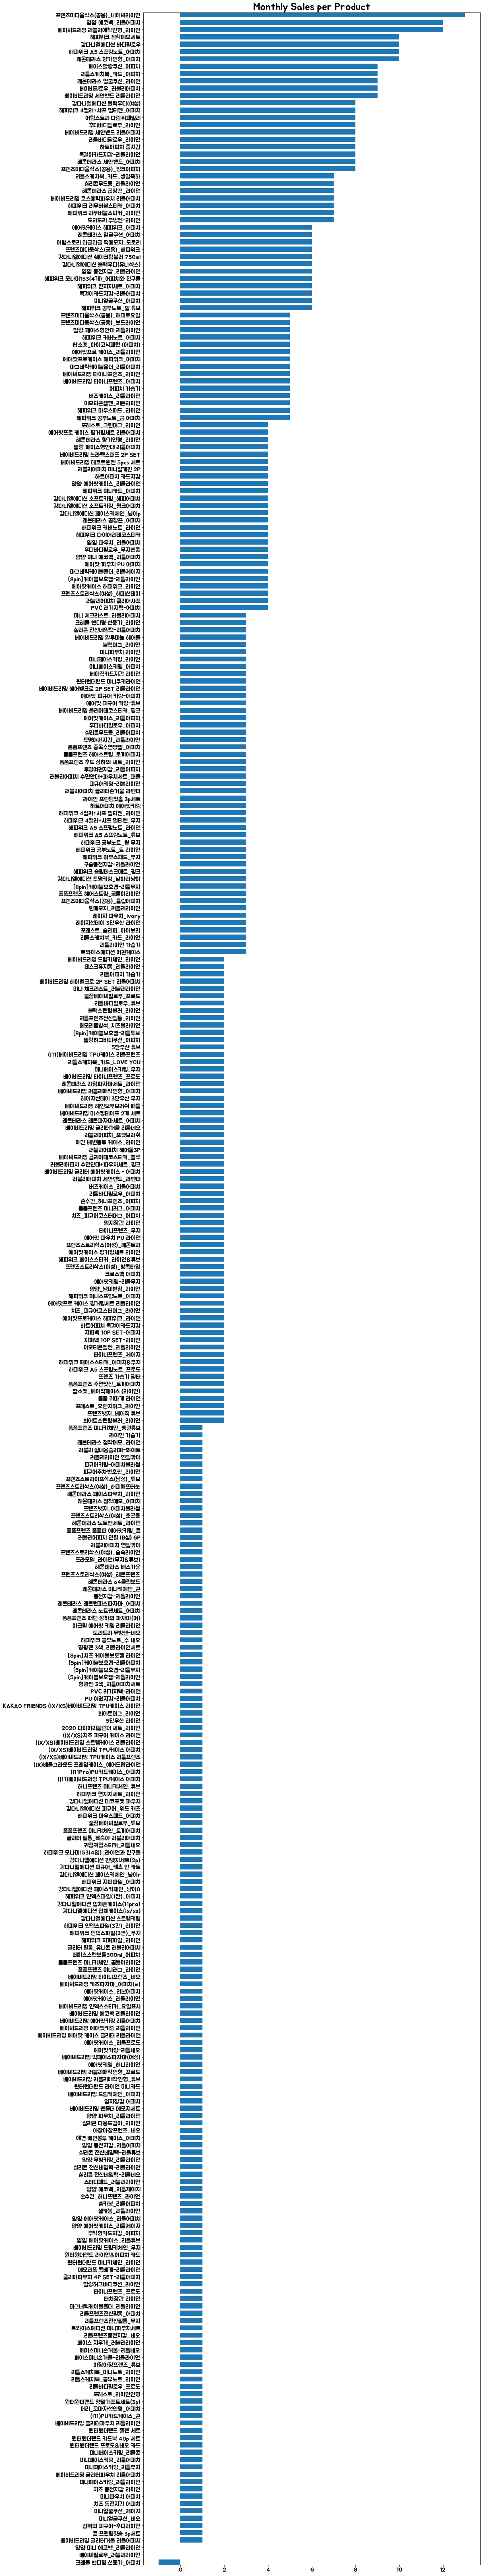

In [873]:
#monthly_sale.plot(kind="barh")
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Users\\Joanna Kang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = [15, 100]
#fig = plt.figure(figsize=(12, 100))
#ax = fig.add_subplot(111)

x = []
y = []

for i in range(len(monthly_sale.index)):
    x.append(monthly_sale.index[i])
    y.append(monthly_sale[7][i])

plt.barh(x, y, height=0.7) 
plt.tick_params(labelsize = 15)
plt.margins(y=0)
plt.title('Monthly Sales per Product', fontsize = 25)

plt.show()

In [874]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap by plt.pcolor()
def heatmap (chart, title, chartsize, title_size, label_size, colorbar):
    #plt.rcParams['figure.figsize'] = [chartsize, chartsize]
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Week', fontsize=label_size)
    #plt.ylabel('Category', fontsize=font_size)
    #if legend:
    #    plt.colorbar()
    plt.tick_params(labelsize = label_size)
    sns.heatmap(chart, annot=True, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar)

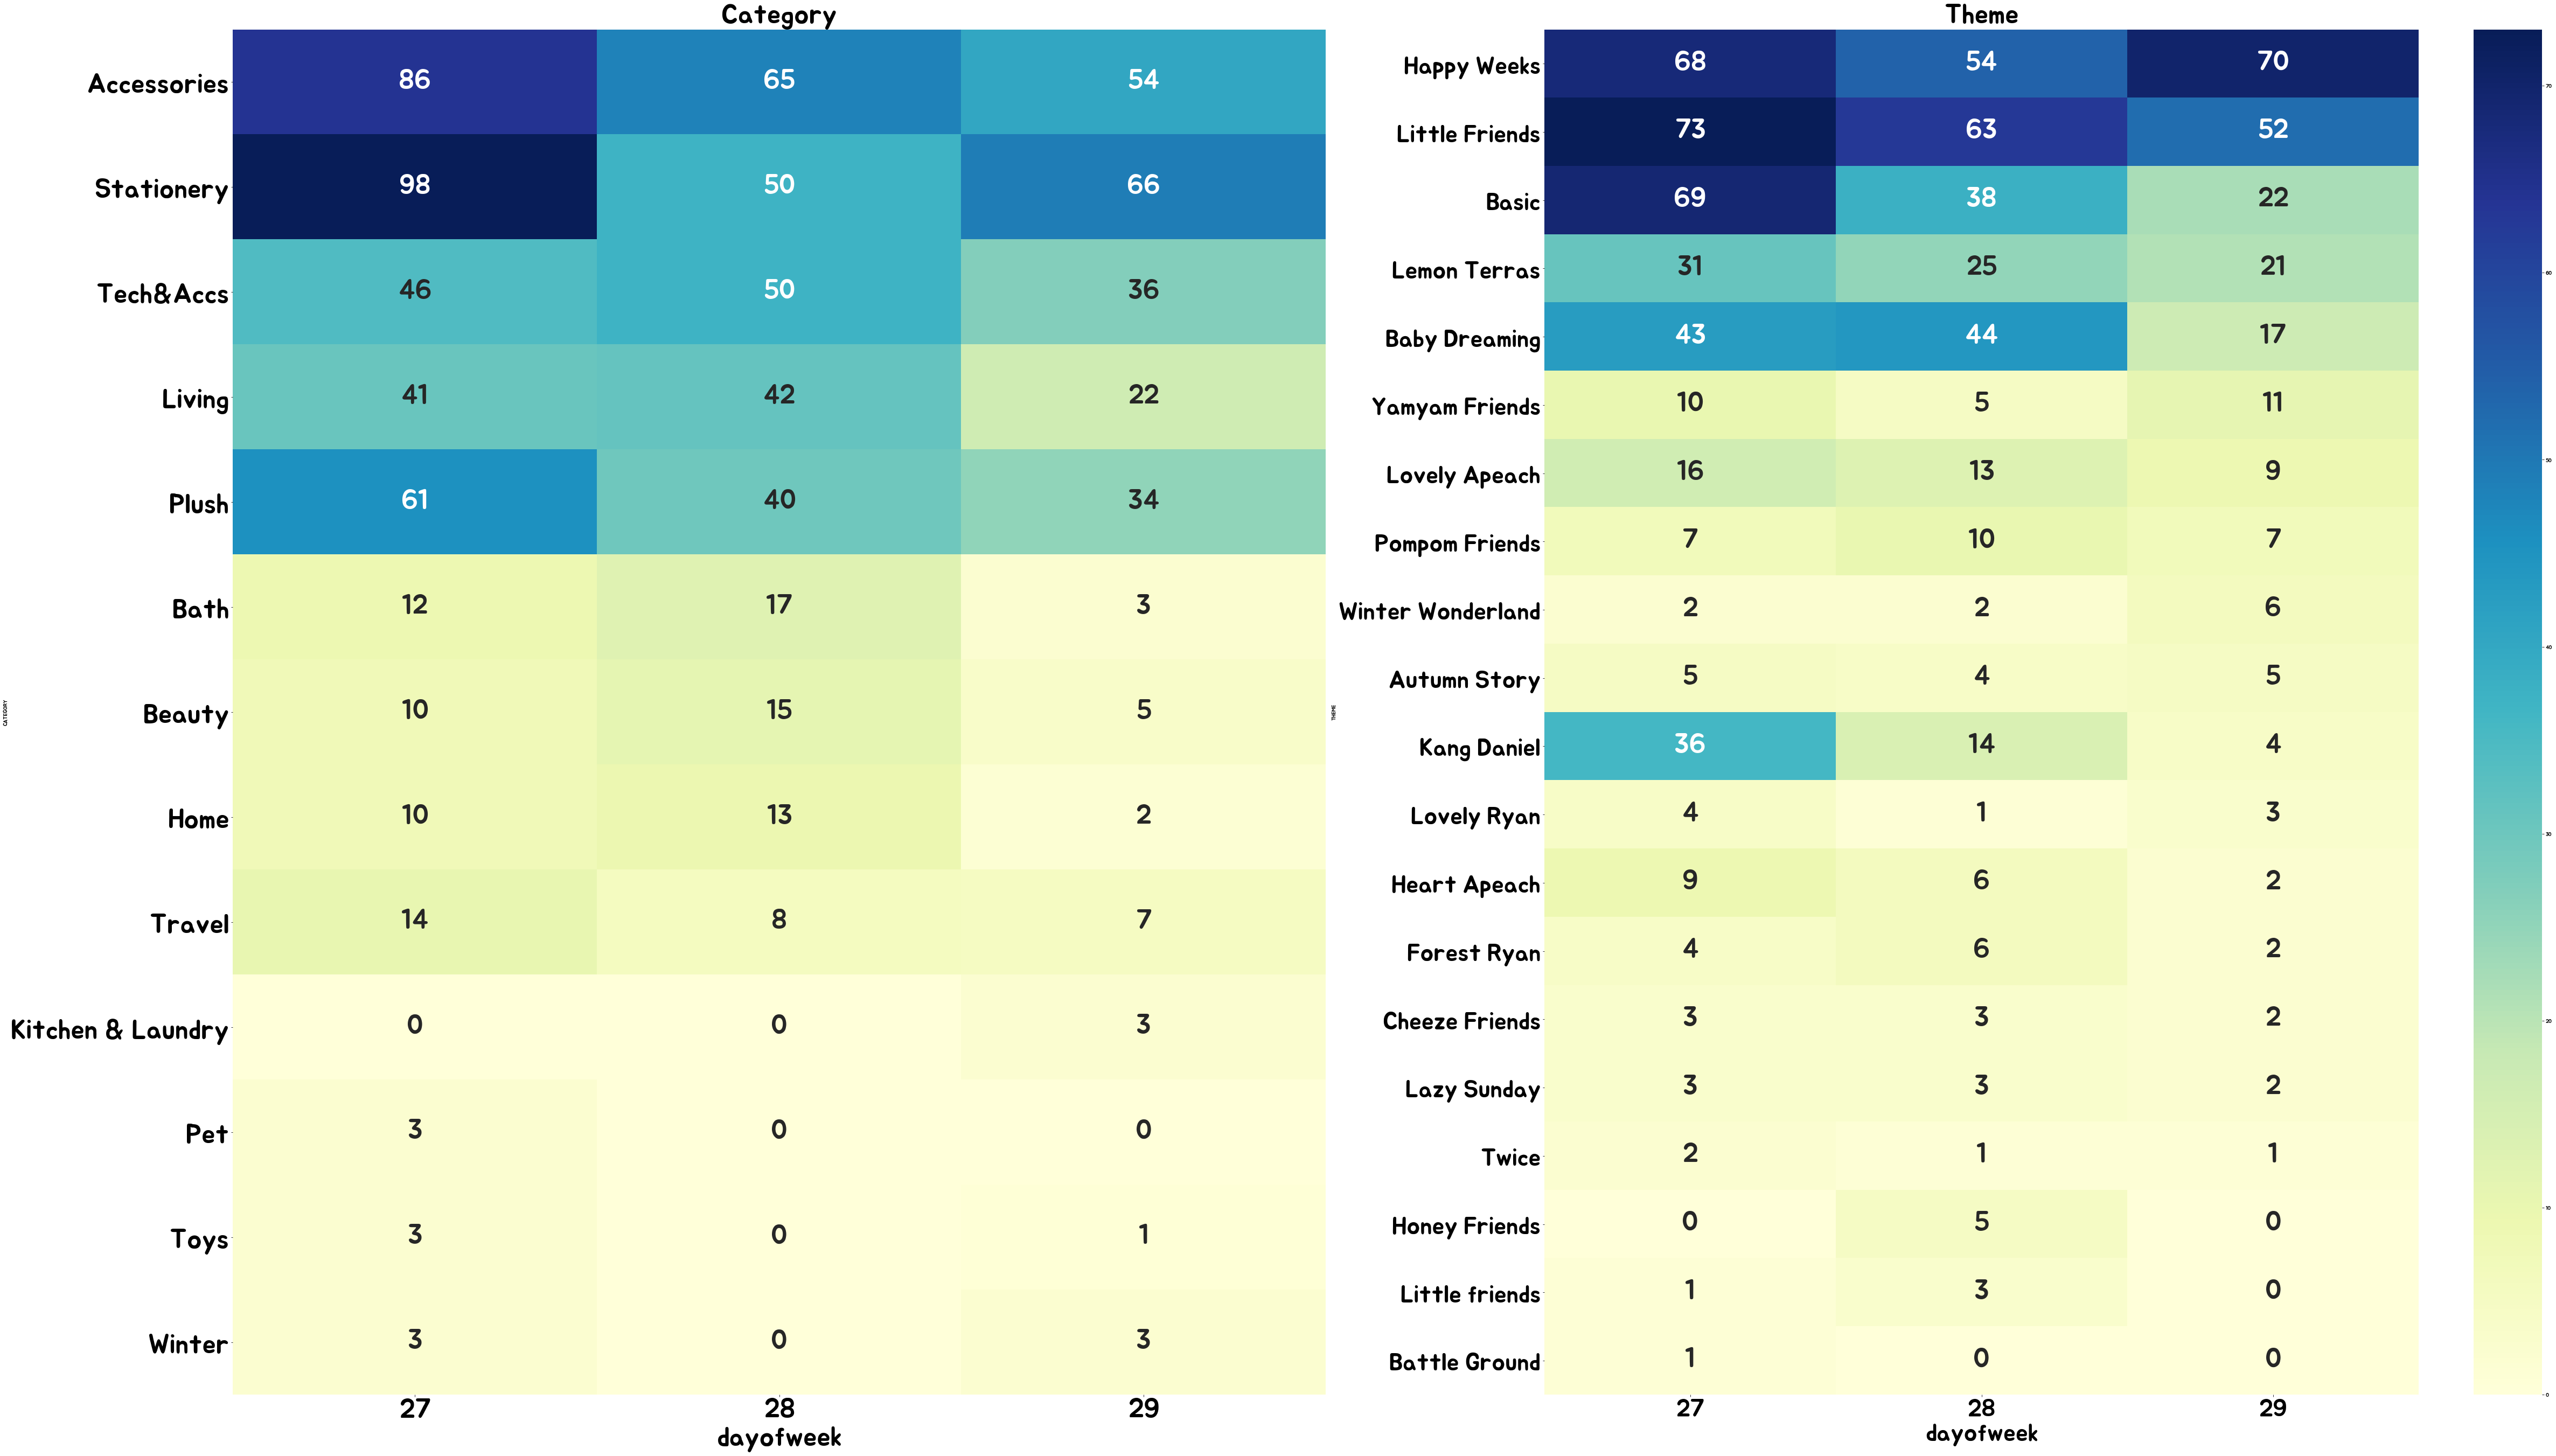

In [879]:
plt.rcParams['figure.figsize'] = [80, 40]


plt.subplot(1,2,1)
category_overall_heatmap = heatmap(category_overall, 'Category', 40, 50, 50, False)

plt.subplot(1,2,2) 
theme_overall_heatmap = heatmap(theme_overall, 'Theme', 40, 50, 45, True)

